In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_point = pd.read_csv('point_scores.csv',index_col=0)
df_spread = pd.read_csv('spread_scores.csv',index_col=0)
df = df_point.set_index(['Model', 'Weeks ahead','Location']).join(df_spread.set_index(['Model', 'Weeks ahead','Location']),how='left')
#df = pd.merge(df_point,df_spread, how='inner',on=["Model", "Weeks ahead", "Location"])
# make LS positive
df['LS'] = -1*df['LS']
df

RMSE     NRMSE          MAPE  \
Model            Weeks ahead Location                                      
BPagano-RtDriven 1           AK         9.567532  0.398647  3.760249e+08   
                             AL        36.348716  0.336562  1.549941e+02   
                             AR        11.333949  0.263580  5.295291e+01   
                             AZ         9.648747  0.182052  2.324008e+01   
                             CA        60.499652  0.286728  2.405915e+01   
...                                          ...       ...           ...   
USC-SI_kJalpha   4           VT         3.614812  0.602469  6.921682e+07   
                             WA        86.418633  1.289830  8.480696e+01   
                             WI        87.536054  2.917868  1.717126e+02   
                             WV        73.658099  2.455270  2.801806e+02   
                             WY        17.828519  1.620774  4.547796e+08   

                                              LS       CRPS        CS  
Model            Weeks ahead Location                                  
BPagano-RtDriven 1           AK         4.642939   6.261536  0.430667  
                             AL         3.602854  21.161538  0.158667  
                             AR         2.438416   6.660344  0.059367  
                             AZ         2.185581   5.896111  0.117100  
                             CA         2.421523  31.778917  0.055333  
...                                          ...        ...       ...  
USC-SI_kJalpha   4           VT         6.902099   2.404098  0.298629  
                             WA         7.854071  54.674870  0.400250  
                             WI         5.380755  33.270654  0.278444  
                             WV        10.000000   0.000000  0.332889  
                             WY         6.022001   9.602415  0.294000  

[5508 rows x 6 columns]

In [2]:
df_spread

,Model,Weeks ahead,Location,LS,CRPS,CS
0,BPagano-RtDriven,1,AK,-4.642939,6.261536,0.430667
1,BPagano-RtDriven,1,AL,-3.602854,21.161538,0.158667
2,BPagano-RtDriven,1,AR,-2.438416,6.660344,0.059367
3,BPagano-RtDriven,1,AZ,-2.185581,5.896111,0.117100
4,BPagano-RtDriven,1,CA,-2.421523,31.778917,0.055333
...,...,...,...,...,...,...
5503,USC-SI_kJalpha,4,VT,-6.902099,2.404098,0.298629
5504,USC-SI_kJalpha,4,WA,-7.854071,54.674870,0.400250
5505,USC-SI_kJalpha,4,WI,-5.380755,33.270654,0.278444
5506,USC-SI_kJalpha,4,WV,-10.000000,0.000000,0.332889


/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_20575/1156337021.py:12: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_20575/1156337021.py:12: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_20575/1156337021.py:12: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_20575/1156337021.py:12: FutureWarning: `sort_columns` is deprecat

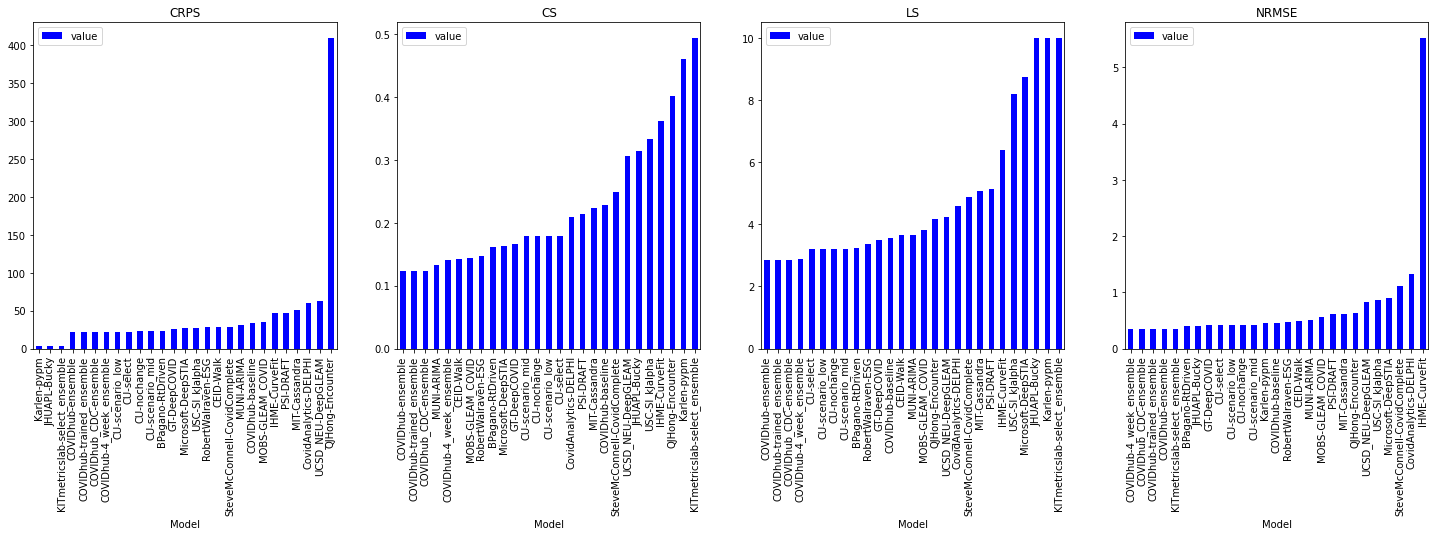

In [4]:
def plot_boxplots(dfi):
    # dfi = avg_per_model_per_week
    dfi = dfi.groupby(['Model']).mean().reset_index()
    # plot
    dfi = dfi.melt(id_vars=['Model'], value_vars=['NRMSE','CRPS','LS','CS'])
    dfi.set_index('variable',inplace=True)
    dfi = dfi.sort_values(by='value')
    grouped = dfi.groupby(level='variable')
    my_colors = ['blue' if i<2 else 'black' for i in range(26)]
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,6), sharey=False,squeeze=False)
    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
    ax.legend()
    plt.show()

overall_avg_per_model = df.groupby(['Model']).mean()
plot_boxplots(overall_avg_per_model)

In [5]:
overall_avg_per_model = df.groupby(['Model']).mean()
overall_avg_per_model

,RMSE,NRMSE,MAPE,LS,CRPS,CS
Model,,,,,,
BPagano-RtDriven,39.798646,0.403196,4.833245e+07,3.239880,22.997715,0.161786
CEID-Walk,43.623116,0.497453,2.943965e+07,3.650675,28.651424,0.143134
COVIDhub-4_week_ensemble,36.539976,0.338940,3.820222e+07,2.873348,22.008473,0.140570
COVIDhub-baseline,48.468637,0.452223,4.157497e+07,3.548720,33.141871,0.228611
COVIDhub-ensemble,37.419005,0.339463,3.852091e+07,2.843798,21.669475,0.123543
COVIDhub-trained_ensemble,37.419005,0.339463,3.852091e+07,2.843798,21.669475,0.123543
COVIDhub_CDC-ensemble,37.419005,0.339463,3.852091e+07,2.843798,21.669475,0.123543
CU-nochange,38.283866,0.427389,4.358728e+07,3.199527,22.581247,0.178901
CU-scenario_low,38.144551,0.426726,4.368294e+07,3.197491,22.450242,0.179101


In [6]:
nrsme_df_avg = overall_avg_per_model[['NRMSE']]
nrsme_df_avg = nrsme_df_avg.sort_values(by='NRMSE')
nrsme_df_avg

,NRMSE
Model,
COVIDhub-4_week_ensemble,0.338940
COVIDhub-ensemble,0.339463
COVIDhub-trained_ensemble,0.339463
COVIDhub_CDC-ensemble,0.339463
KITmetricslab-select_ensemble,0.353067
BPagano-RtDriven,0.403196
JHUAPL-Bucky,0.409732
GT-DeepCOVID,0.425028
CU-select,0.426726


In [7]:
ls_df_avg = overall_avg_per_model[['LS']]
ls_df_avg = ls_df_avg.sort_values(by='LS')
ls_df_avg

,LS
Model,
COVIDhub-ensemble,2.843798
COVIDhub-trained_ensemble,2.843798
COVIDhub_CDC-ensemble,2.843798
COVIDhub-4_week_ensemble,2.873348
CU-select,3.197491
CU-scenario_low,3.197491
CU-nochange,3.199527
CU-scenario_mid,3.202285
BPagano-RtDriven,3.239880


In [8]:
cs_df_avg = overall_avg_per_model[['CS']]
cs_df_avg = cs_df_avg.sort_values(by='CS')
cs_df_avg

,CS
Model,
COVIDhub-ensemble,0.123543
COVIDhub-trained_ensemble,0.123543
COVIDhub_CDC-ensemble,0.123543
MUNI-ARIMA,0.132325
COVIDhub-4_week_ensemble,0.140570
CEID-Walk,0.143134
MOBS-GLEAM_COVID,0.143695
RobertWalraven-ESG,0.146437
BPagano-RtDriven,0.161786


In [9]:
crps_df_avg = overall_avg_per_model[['CRPS']]
crps_df_avg = crps_df_avg.sort_values(by='CRPS')
crps_df_avg

,CRPS
Model,
Karlen-pypm,3.765350
KITmetricslab-select_ensemble,3.857523
JHUAPL-Bucky,3.857523
COVIDhub-ensemble,21.669475
COVIDhub-trained_ensemble,21.669475
COVIDhub_CDC-ensemble,21.669475
COVIDhub-4_week_ensemble,22.008473
CU-scenario_low,22.450242
CU-select,22.450242


In [10]:
rsme_df_avg = overall_avg_per_model[['RMSE']]
rsme_df_avg = rsme_df_avg.sort_values(by='RMSE')
rsme_df_avg

,RMSE
Model,
COVIDhub-4_week_ensemble,36.539976
COVIDhub-ensemble,37.419005
COVIDhub-trained_ensemble,37.419005
COVIDhub_CDC-ensemble,37.419005
CU-select,38.144551
CU-scenario_low,38.144551
CU-nochange,38.283866
CU-scenario_mid,38.502224
BPagano-RtDriven,39.798646


In [11]:
mape_df_avg = overall_avg_per_model[['MAPE']]
mape_df_avg = mape_df_avg.sort_values(by='MAPE')
mape_df_avg

,MAPE
Model,
QJHong-Encounter,1.778876e+01
PSI-DRAFT,1.258873e+07
MIT-Cassandra,2.072108e+07
CovidAnalytics-DELPHI,2.401976e+07
SteveMcConnell-CovidComplete,2.619834e+07
MOBS-GLEAM_COVID,2.901978e+07
CEID-Walk,2.943965e+07
MUNI-ARIMA,3.170889e+07
COVIDhub-4_week_ensemble,3.820222e+07
